In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D

In [3]:
bcast_binarytree = pd.read_csv('bcast_binarytree.csv')
bcast_chain = pd.read_csv('bcast_chain.csv')
bcast_binomial = pd.read_csv('bcast_binomial.csv')
bcast_default = pd.read_csv('bcast_default.csv')

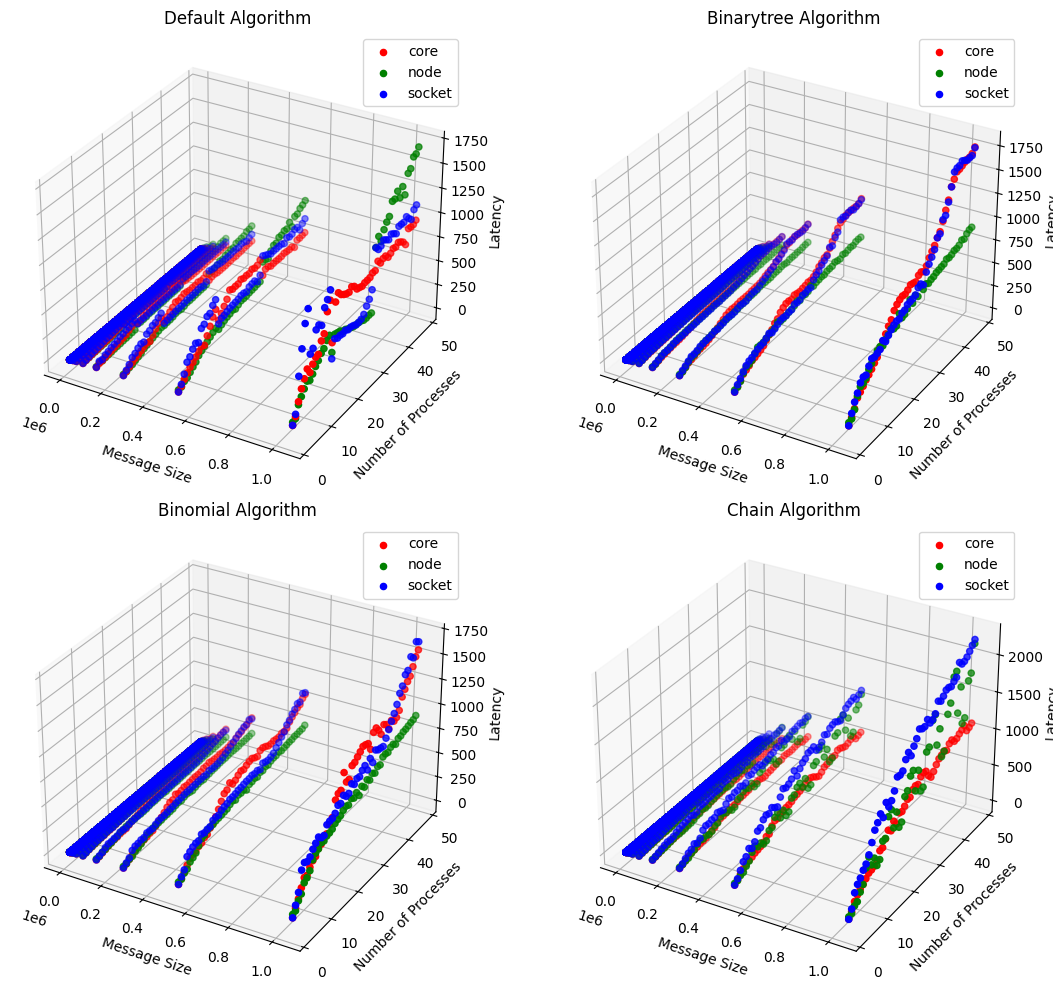

In [4]:
# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# Define the list of algorithms and their corresponding DataFrames
algorithms = ['Default', 'Binarytree', 'Binomial', 'Chain']
dfs = [bcast_default, bcast_binarytree, bcast_binomial, bcast_chain]

# Iterate over each subplot and corresponding algorithm's DataFrame
for ax, algorithm, df in zip(axs.flatten(), algorithms, dfs):
    # Iterate over each group-by option (node, core, socket)
    for allocation, color in zip(['core', 'node', 'socket'], ['r', 'g', 'b']):
        # Filter DataFrame based on allocation type
        df_allocation = df[df['Allocation'] == allocation]
        # Scatter plot for the current group-by option
        ax.scatter(df_allocation['MessageSize'], df_allocation['Processes'], df_allocation['Latency'], c=color, label=allocation, marker='o')

    # Set labels and title
    ax.set_xlabel('Message Size')  # Switched with 'Number of Processes'
    ax.set_ylabel('Number of Processes')  # Switched with 'Message Size'
    ax.set_zlabel('Latency')
    ax.set_title(f'{algorithm} Algorithm')
    ax.legend()

plt.tight_layout()
plt.show()

In [16]:
def plot_latency_vs_processes(algorithms, dfs, allocation, message_size):
    plt.figure(figsize=(10, 6))

    # Iterate over each algorithm's DataFrame
    for algorithm, df in zip(algorithms, dfs):
        # Filter DataFrame based on allocation and message size
        df_filtered = df[(df['Allocation'] == allocation) & (df['MessageSize'] == message_size)]
        
        # Plot number of processes vs. latency
        plt.plot(df_filtered['Processes'], df_filtered['Latency'], label=algorithm)

    # Set labels and title
    plt.xlabel('Number of Processes')
    plt.ylabel('Latency')
    plt.title(f'Latency vs. Number of Processes (Map-by: {allocation.capitalize()}, Message Size: {message_size})')
    plt.legend()
    plt.grid(True)

    # Add vertical lines on powers of 2
    max_processes = max(df_filtered['Processes'])
    powers_of_2 = [2 ** i for i in range(int(np.log2(max_processes)) + 1)]
    for power in powers_of_2:
        plt.axvline(x=power, linestyle='--', color='gray')

    # Show the plot
    plt.show()

In [57]:
def plot_latency_vs_message_size(algorithms, dfs, allocation, num_processes):
    #plt.figure(figsize=(10, 6))

    # Iterate over each algorithm's DataFrame
    for algorithm, df in zip(algorithms, dfs):
        # Filter DataFrame based on allocation and number of processes
        df_filtered = df[(df['Allocation'] == allocation) & (df['Processes'] == num_processes)]
        
        # Plot message size vs. latency
        plt.plot(df_filtered['MessageSize'], df_filtered['Latency'], label=algorithm)

    # Set labels and title
    plt.xlabel('Message Size')
    plt.ylabel('Latency')
    plt.title(f'Latency vs. Message Size (Map-by: {allocation.capitalize()}, Processes: {num_processes})')
    plt.legend()
    plt.grid(True)

    # Show the plot
    #plt.show()


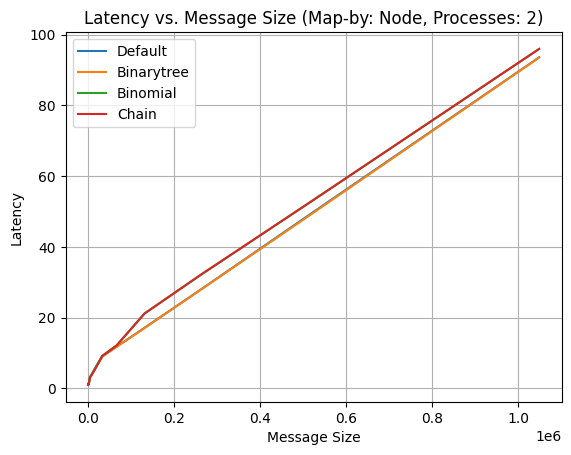

In [58]:
plot_latency_vs_message_size(algorithms, dfs, 'node', 2)

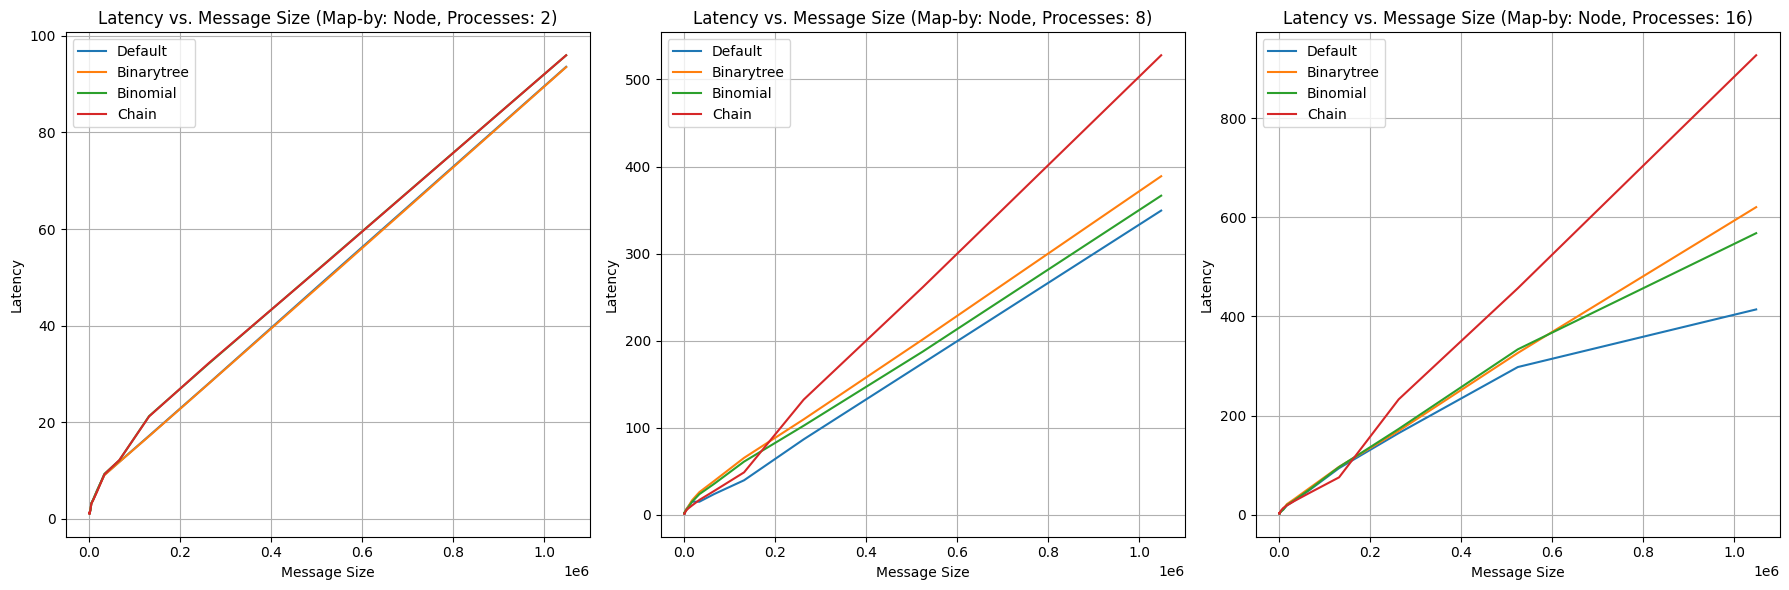

In [59]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Set the current axes to the first subplot and plot with 2 processes
plt.sca(axs[0])
plot_latency_vs_message_size(algorithms, dfs, 'node', 2)

# Set the current axes to the second subplot and plot with 8 processes
plt.sca(axs[1])
plot_latency_vs_message_size(algorithms, dfs, 'node', 8)

# Set the current axes to the third subplot and plot with 16 processes
plt.sca(axs[2])
plot_latency_vs_message_size(algorithms, dfs, 'node', 16)

# Adjust layout so titles and labels don't overlap
plt.tight_layout()

# Show the plots
plt.show()

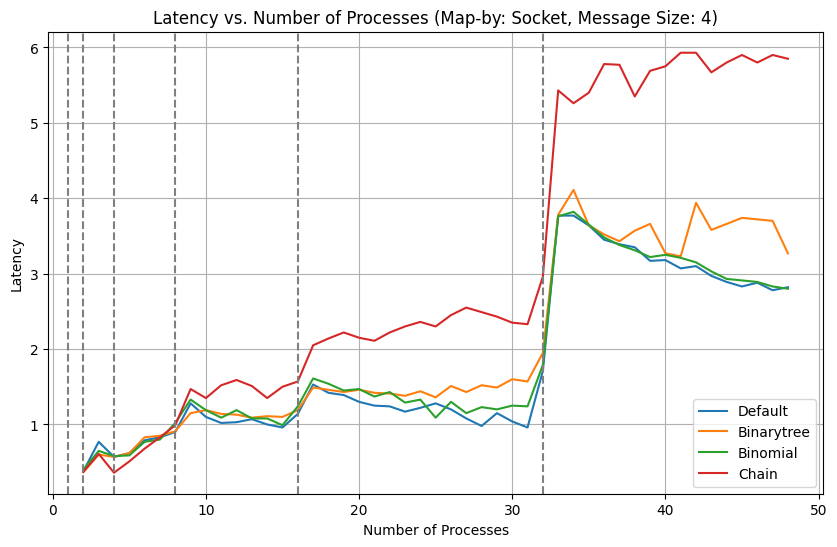

In [17]:
plot_latency_vs_processes(algorithms, dfs, 'socket', 4)

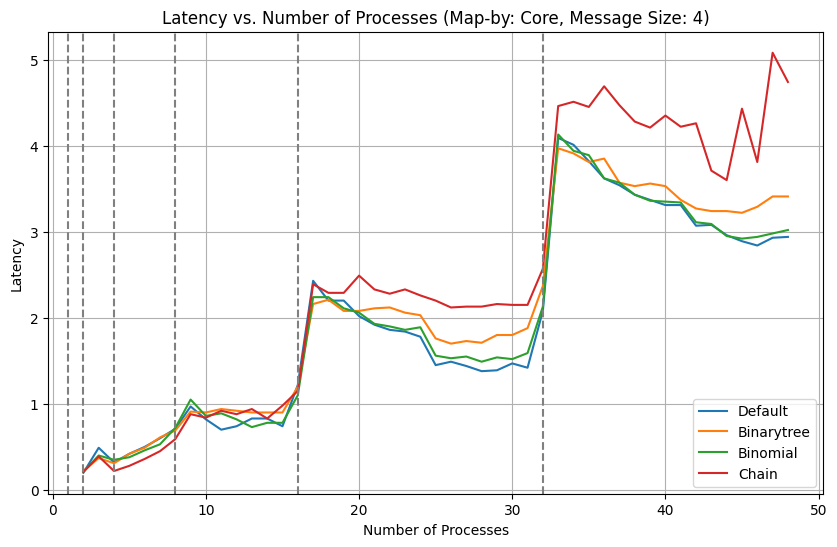

In [18]:
plot_latency_vs_processes(algorithms, dfs, 'core', 4)

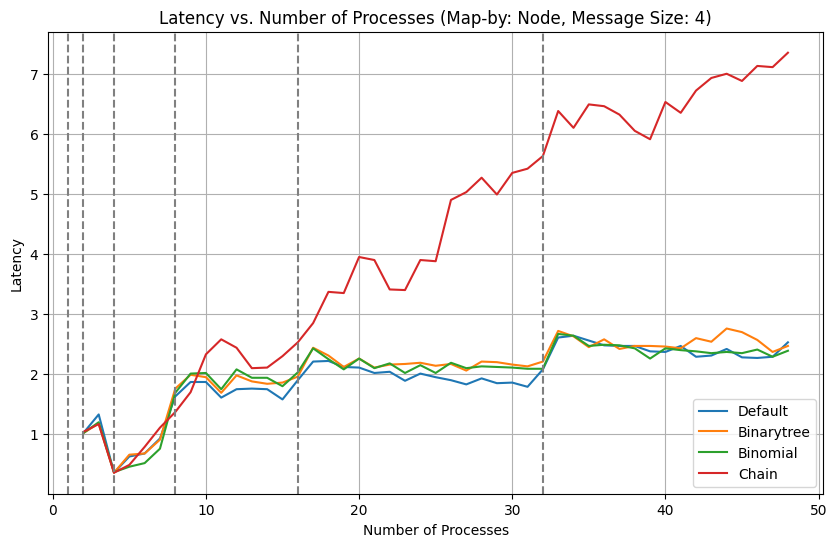

In [19]:
plot_latency_vs_processes(algorithms, dfs, 'node', 4)

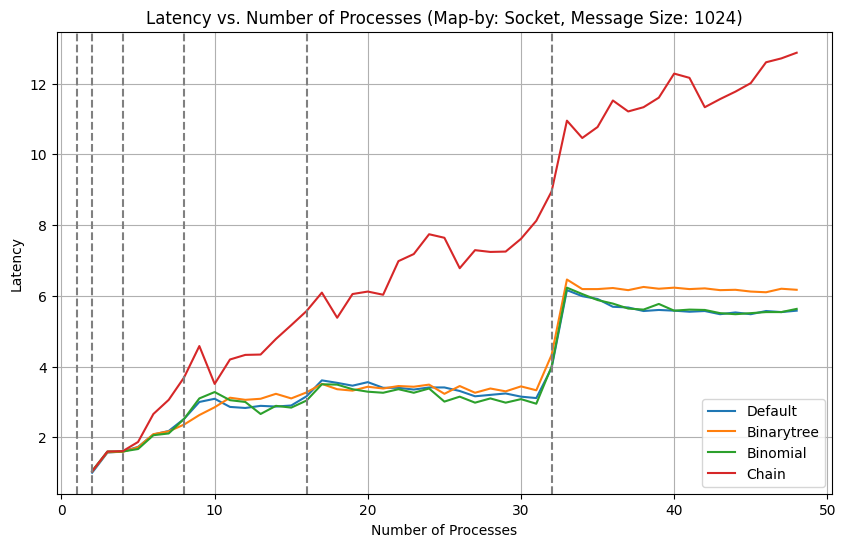

In [20]:
plot_latency_vs_processes(algorithms, dfs, 'socket', 1024)

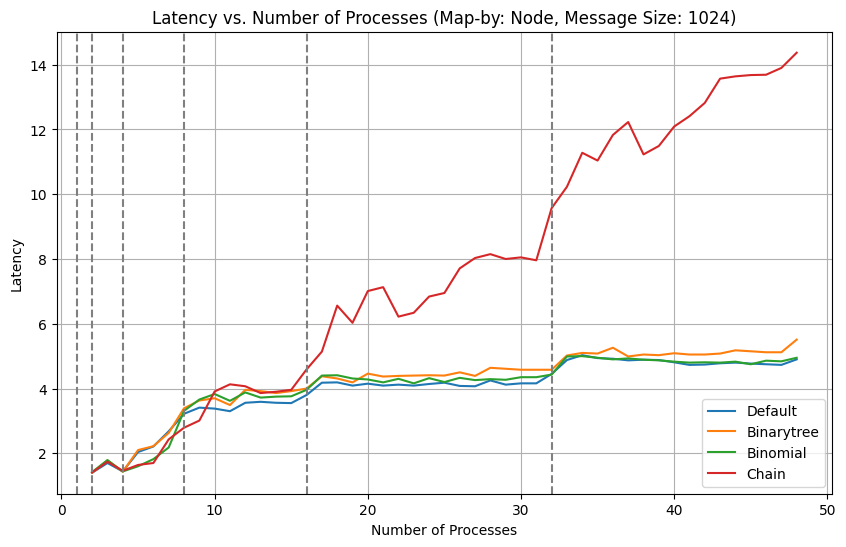

In [21]:
plot_latency_vs_processes(algorithms, dfs, 'node', 1024)

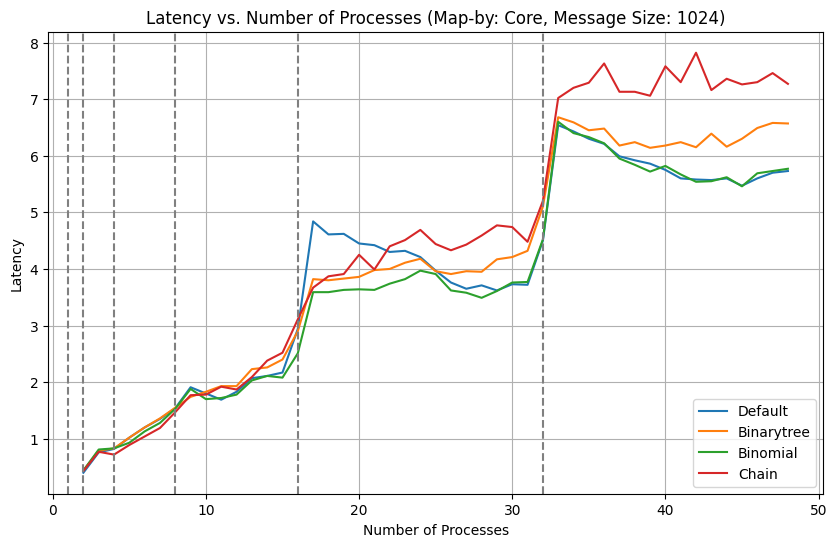

In [22]:
plot_latency_vs_processes(algorithms, dfs, 'core', 1024)